## Advanced Machine Learning - SciKit Learn
### with Andreas Mueller 

# Clustering
* First, import packages and load the dataset
* Simple dataset of three blobs, 2D array of number of samples by number of features
* 100 data points, each described by 2 features, displayed in scatterplot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

(100, 2)

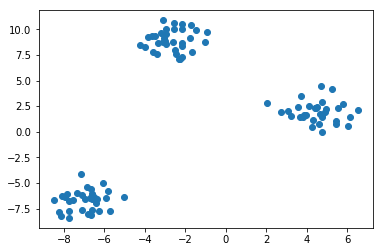

In [4]:
plt.scatter(X[:, 0], X[:, 1])

### Apply Clustering Algorithm
* Import the class from sklearn and instantiate it
* Kmeans requires us to specify the number of clusters (k=3)
* Clustering is unsupervised learning procedure, so we only pass X
* To get cluster labels, we apply predict method to our data

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
cluster_labels = kmeans.predict(X)
cluster_labels

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

### Plot the Clusters
* We can color a plot of our data by cluster labels (0 to 2), showing kMeans identified three clusters
* Many ways to quantify how well clustering algorithm performs, important for high dimension, not visualized
* Many clustering approaches require some ground truth labels of the clustering, rare in real world application

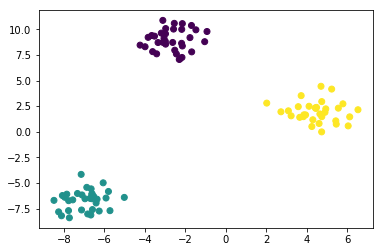

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)

#### "Ground truth" cluster memberships are stored in 'y'
* We can try to validate our clustering using accuracy score
* However, accuracy score gives us very low performance (34%) even though clusters identified correctly
* Examine the "Confusion Matrix" to look at accuracy of clustering

In [12]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y, cluster_labels)

0.34000000000000002

##### Although KMeans correctly clustered points together, the numbering of clusters is arbitrary 
* As the labelings are arbitrary, we want our performance measure invariant against permutations of cluster labels
* One method that does this is the adjusted random score, adjusts for chance performance
* This gives us a one-to-one correspondence between true gound scores and kMeans cluster, a perfect score. 
* (Evaluating clustering when no ground truth labels are available is much trickier)

In [15]:
confusion_matrix(y, cluster_labels)

array([[34,  0,  0],
       [ 0,  0, 33],
       [ 0, 33,  0]])

In [16]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, cluster_labels)

1.0

#### CAVEAT for Clustering with Sklearn:
* Not all clustering algorithms have predict method
* Not all of them can generalize to new data

## KMeans can generalize, SpectralClustering does not
* KMeans has a 'predict' function; we can create some more data (X_more)
* Use the predict method to find which cluster new data points belong to
* Then visualize which clusters the new data points belong to 

In [17]:
X_more = np.random.uniform(X.min(), X.max(), size=(10,2))
X_more
more_cluster_labels = kmeans.predict(X_more)

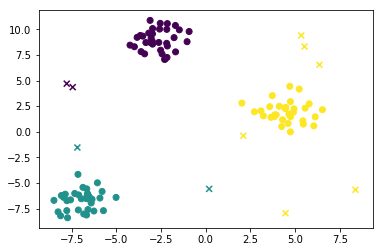

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(X_more[:, 0], X_more[:, 1], marker="x", c=more_cluster_labels)

### Getting Cluster Labels without using predict method
* SpecturalClustering algorithm does not have a Predict method, will throw an error
* After calling fit, all clustering algos have attribute called 'labels', cluster labels for training set
* Alternatively, we can call the fit_predict() 

In [31]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, gamma=.1)

In [32]:
spectral_clustering.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=0.1, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [33]:
cluster_labels = spectral_clustering.predict(X)

AttributeError: 'SpectralClustering' object has no attribute 'predict'

In [34]:
spectral_clustering.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [35]:
cluster_labels = spectral_clustering.fit_predict(X)

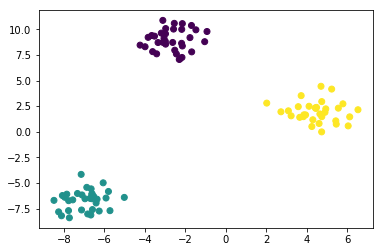

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)

NOTE: We cannot apply Spectral Clustering to new data obtained after building the model. 
* To apply the spectral_clustering algorithm to more data, we would have to build the whole model again. 

### See SciKit-Learn website for Overview of Clustering Algorithms
The SciKit-Learn website provides a nice overview of different clustering algorithms in Sklearn. Example plot gives examples of some propoerties of different clustering algorithms.
http://scikit-learn.org/stable/modules/clustering.html#clustering
#### Keep in mind:
* 2D toy datasets are great for visualizing some properties of the algorithms, however, 
* they do not give a good indication of how clustering algorithms behave in higher dimensions.

## A second (less trivial) example:
* Use dataset of handwritten digits (0-9; using kMeans with n_clusters set to 10
* Call fit to build the KMeans model, then use predict method to infer cluster labels
* Compare predicted clusters labels to "ground truth", getting the adjusted_random_score

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [39]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
adjusted_rand_score(y, kmeans.predict(X))

0.66480899850702446

##### Score of 0.66 is decent, but far from perfect
* We can get more qualitative insight into clustering by inspecting cluster centers found by kMeans
* Each datapoint in dataset is an 8 x 8 greyscale image of handwritten digit

### Cluster centers live in the same space:
* We can reshape them into an image, and plot them
* Most of the cluster centers resemble digits quite well
* No clear center for the numbers 1 or 8, which may explain why we had bad adjusted_rand_score

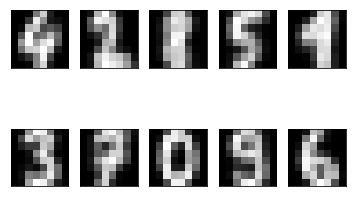

In [42]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8,8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())